## Análise fatorial 

#### Sarah Maria Braga Silva - 11811GIN013

#### Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
from scipy import stats as st
import researchpy as rs
from factor_analyzer import FactorAnalyzer as fa
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity as bartlett
from factor_analyzer.factor_analyzer import calculate_kmo as kmo
from scipy.stats import shapiro

pd.set_option("display.max_columns", 101)

#### Dados

In [2]:
df = pd.read_excel("Base_Docencia.xlsx")

Base possui dados nulos, então podemos excluir eles para facilitar a AFE

In [3]:
df.isnull().sum()

RespondentID                                    0
Sexo                                            0
Idade                                           0
Graduacao                                       0
Graduacao_Outro                                86
IES_Graduacao                                   0
Lato1                                          35
Lato2                                          86
Lato3                                          99
Lato4                                         103
Lato5                                         103
IES_Lato1                                      40
IES_Lato2                                      86
IES_Lato3                                      99
IES_Lato4                                     103
IES_Lato5                                     103
Destino_Profissional                            0
Destino_Profissional_Outro                     97
MESTRADO_IES                                    0
MESTRADO_IES_Outro                             99


In [4]:
# limpar dados nulos de colunas específicas
df = df.dropna(subset=['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4'])

In [5]:
df.head(3)

,RespondentID,Sexo,Idade,Graduacao,Graduacao_Outro,IES_Graduacao,Lato1,Lato2,Lato3,Lato4,Lato5,IES_Lato1,IES_Lato2,IES_Lato3,IES_Lato4,IES_Lato5,Destino_Profissional,Destino_Profissional_Outro,MESTRADO_IES,MESTRADO_IES_Outro,Area_Mestrado,Atuacao_Docente_Antes_Mestrado,Tempo_Entre_Graduacao_Mestrado,Regime_Dedicacao_Mestrado,Atuacao_Docente_Durante_Mestrado,Tipo_IES_Atuacao_Mestrado,Regime_Dedicacao_Docente_Mestrado,Tempo_Atuacao_Docente_Mestrado,Mestrado_Ativ_Aprendizagem_Pesq_Cientifica,Mestrado_Ativ_Aprendizagem_Sala_Aula,Mestrado_Ativ_Aprendizagem_Leitura,Mestrado_Ativ_Aprendizagem_Estagio,Mestrado_Ativ_Aprendizagem_Informais,Mestrado_Ativ_Aprendizagem_Outros,DOUTORADO_IES,DOUTORADO_IES_Outro,Area_Doutorado,Atuacao_Docente_Antes_Doutorado,Tempo_Entre_Mestrado_Doutorado,Regime_Dedicacao_Doutorado,Atuacao_Docente_Durante_Doutorado,Tipo_IES_Atuacao_Doutorado,Regime_Dedicacao_Docente_Doutorado,Tempo_Atuacao_Docente,Doutorado_Ativ_Aprendizagem_Pesq_Cientifica,Doutorado_Ativ_Aprendizagem_Sala_Aula,Doutorado_Ativ_Aprendizagem_Leitura,Doutorado_Ativ_Aprendizagem_Estagio,Doutorado_Ativ_Aprendizagem_Informais,Doutorado_Ativ_Aprendizagem_Outros,...,ADSA4,ADSA_OUTRO,ALAT1,ALAT2,ALAT3,ALAT4,ALAT_OUTRO,AEE1,AEE2,AEE3,AEE_OUTRO,AI1,AI2,AI_OUTRO,AD1,AD2,AD3,AD4,AD_OUTRO,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1
0,1812836846,2,40,1,NaN,1,ESTATÍSTICA,MARKETING,NaN,NaN,NaN,UFU,UFU,NaN,NaN,NaN,1,NaN,3,NaN,MARKETING,2,4,1,2,2.0,1.0,3.0,NaN,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,4.0,4.0,4.0,4.0,NaN,1.0,1.0,1.0,NaN,4.0,3.0,NaN,2.0,4.0,1.0,1.0,NaN,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,-0.127755,-2.304441,0.418520,-0.418158,0.006100,1.180256,-0.998602
1,1811173769,2,44,0,Engenharia Civil,2,Administração de RH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,Relações de poder e dinâmica das organizações,1,4,1,1,1.0,3.0,5.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,4.0,4.0,5.0,5.0,NaN,2.0,5.0,1.0,NaN,5.0,5.0,NaN,4.0,4.0,5.0,5.0,NaN,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,0.860313,-1.486463,0.365600,3.053769,0.920257,1.019630,-0.009606
2,1806566000,1,29,0,Enfermagem,2,Enfermagem do Trabalho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,NaN,Organização e Estratégia,1,3,1,1,2.0,1.0,3.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,4.0,4.0,4.0,4.0,NaN,5.0,1.0,1.0,NaN,5.0,5.0,NaN,5.0,5.0,1.0,1.0,NaN,4.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,3.0,5.0,4.0,1.0,4.0,4.0,3.0,5.0,5.0,5.0,1.0,1.0,1.0,4.0,4.0,5.0,0.285949,0.964877,1.771231,-0.897291,-1.406901,0.602186,-0.591369


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 102
Columns: 109 entries, RespondentID to FAC7_1
dtypes: float64(81), int64(11), object(17)
memory usage: 75.6+ KB


Para verificar o tipo de cada variável:

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 102
Data columns (total 109 columns):
RespondentID                                   int64
Sexo                                           int64
Idade                                          int64
Graduacao                                      int64
Graduacao_Outro                                object
IES_Graduacao                                  int64
Lato1                                          object
Lato2                                          object
Lato3                                          object
Lato4                                          float64
Lato5                                          float64
IES_Lato1                                      object
IES_Lato2                                      object
IES_Lato3                                      object
IES_Lato4                                      float64
IES_Lato5                                      float64
Destino_Profissional            

Todas as classes utilizadas na AFE estão como float

## Exploração dos Dados

### Estatística Descritiva

In [10]:
df.describe().round(2)

,RespondentID,Sexo,Idade,Graduacao,IES_Graduacao,Lato4,Lato5,IES_Lato4,IES_Lato5,Destino_Profissional,MESTRADO_IES,Atuacao_Docente_Antes_Mestrado,Tempo_Entre_Graduacao_Mestrado,Regime_Dedicacao_Mestrado,Atuacao_Docente_Durante_Mestrado,Tipo_IES_Atuacao_Mestrado,Regime_Dedicacao_Docente_Mestrado,Tempo_Atuacao_Docente_Mestrado,Mestrado_Ativ_Aprendizagem_Pesq_Cientifica,Mestrado_Ativ_Aprendizagem_Sala_Aula,Mestrado_Ativ_Aprendizagem_Leitura,Mestrado_Ativ_Aprendizagem_Estagio,Mestrado_Ativ_Aprendizagem_Informais,DOUTORADO_IES,Atuacao_Docente_Antes_Doutorado,Tempo_Entre_Mestrado_Doutorado,Regime_Dedicacao_Doutorado,Atuacao_Docente_Durante_Doutorado,Tipo_IES_Atuacao_Doutorado,Regime_Dedicacao_Docente_Doutorado,Tempo_Atuacao_Docente,Doutorado_Ativ_Aprendizagem_Pesq_Cientifica,Doutorado_Ativ_Aprendizagem_Sala_Aula,Doutorado_Ativ_Aprendizagem_Leitura,Doutorado_Ativ_Aprendizagem_Estagio,Doutorado_Ativ_Aprendizagem_Informais,APC1,APC2,APC3,APC4,APC5,ADSA1,ADSA2,ADSA3,ADSA4,ADSA_OUTRO,ALAT1,ALAT2,ALAT3,ALAT4,ALAT_OUTRO,AEE1,AEE2,AEE3,AI1,AI2,AI_OUTRO,AD1,AD2,AD3,AD4,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1
count,8.800000e+01,88.00,88.00,88.00,88.00,0.0,0.0,0.0,0.0,88.00,88.00,88.00,88.00,88.00,88.00,69.00,66.00,67.00,71.0,75.0,75.0,25.0,31.0,7.0,7.0,7.00,7.00,7.00,7.0,7.0,7.00,6.0,8.0,8.0,0.0,1.0,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,0.0,88.00,88.00,88.00,88.00,0.0,88.00,88.00,88.00,88.00,88.00,0.0,88.00,88.00,88.00,88.00,88.00,87.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,87.00,88.00,88.00,87.00,87.00,86.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00
mean,1.763484e+09,1.47,35.32,1.26,1.47,NaN,NaN,NaN,NaN,2.05,2.12,1.62,3.08,1.34,2.00,1.57,1.92,2.33,1.0,2.0,3.0,4.0,5.0,2.0,1.0,3.00,1.71,2.00,1.0,3.0,3.29,1.0,2.0,3.0,NaN,5.0,3.78,3.58,4.30,3.75,2.82,4.34,4.23,4.22,3.41,NaN,4.32,4.02,3.92,4.08,NaN,2.82,2.52,1.52,3.86,2.68,NaN,3.17,3.49,1.58,1.59,3.97,4.06,4.08,3.66,4.19,4.07,3.77,4.25,4.10,4.32,4.16,3.86,3.70,4.09,3.77,3.83,3.55,3.79,3.85,3.52,4.02,3.91,3.73,3.93,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,2.707635e+07,0.50,8.94,1.15,0.50,NaN,NaN,NaN,NaN,1.28,0.87,0.65,1.37,0.48,0.86,0.50,0.88,1.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.82,0.49,0.82,0.0,0.0,1.11,0.0,0.0,0.0,NaN,NaN,1.13,1.01,0.86,1.10,1.33,0.68,0.72,0.90,1.05,NaN,0.75,0.97,0.83,0.93,NaN,1.24,1.43,0.98,1.00,1.44,NaN,1.19,1.30,1.12,1.13,0.72,0.64,0.81,0.83,0.76,0.75,0.84,0.68,0.79,0.72,0.73,0.91,0.82,0.72,0.92,0.95,1.10,1.11,0.90,1.10,0.91,0.87,0.87,0.96,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,1.718925e+09,1.00,23.00,0.00,1.00,NaN,NaN,NaN,NaN,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,2.0,3.0,4.0,5.0,2.0,1.0,2.00,1.00,1.00,1.0,3.0,2.00,1.0,2.0,3.0,NaN,5.0,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,NaN,2.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,-2.98,-2.30,-3.50,-1.33,-3.13,-3.44,-1.55
25%,1.744037e+09,1.00,28.00,1.00,1.00,NaN,NaN,NaN,NaN,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.0,2.0,3.0,4.0,5.0,2.0,1.0,2.50,1.50,1.50,1.0,3.0,2.50,1.0,2.0,3.0,NaN,5.0,3.00,3.00,4.00,3.00,2.00,4.00,4.00,4.00,3.00,NaN,4.00,4.00,4.00,4.00,NaN,2.00,1.00,1.00,3.00,1.00,NaN,2.00,3.00,1.00,1.00,4.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.75,3.00,3.00,3.00,-0.68,-0.79,-0.65,-0.60,-0.62,-0.49,-0.65
50%,1.753536e+09,1.00,34.00,1.00,1.00,NaN,NaN,NaN,NaN,2.00,2.00,2.00,3.00,1.00,2.00,2.00,2.00,2.00,1.0,2.0,3.0,4.0,5.0,2.0,1.0,3.00,2.00,2.00,1.0,3.0,3.00,1.0,2.0,3.0,NaN,5.0,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,3.00,NaN,4.00,4.00,4.00,4.00,NaN,3.00,2.00,1.00,4.00,3.00,NaN,3.00,4.00,1.00,1.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,-0.13,0.07,0.24,-0.25,-0.0

### Distribuição dos Dados - BoxPlot e Histograma

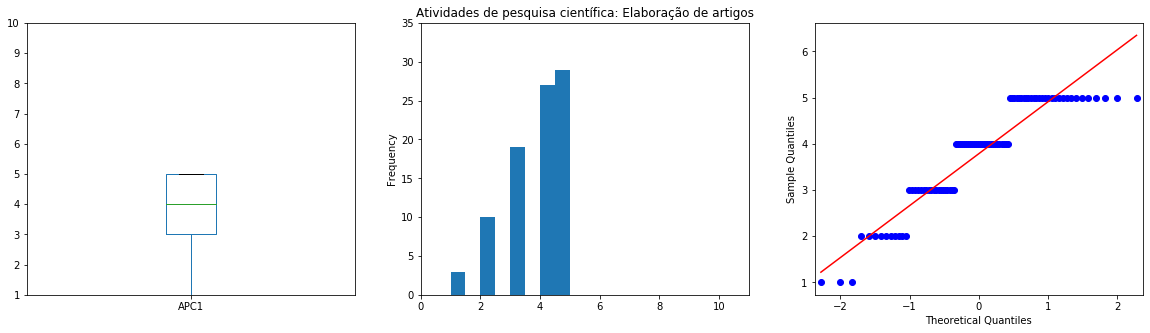

In [11]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["APC1"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["APC1"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de pesquisa científica: Elaboração de artigos').set_ylim(0, 35)
qqplot(df["APC1"], line='s', ax=axes[2])
plt.show()

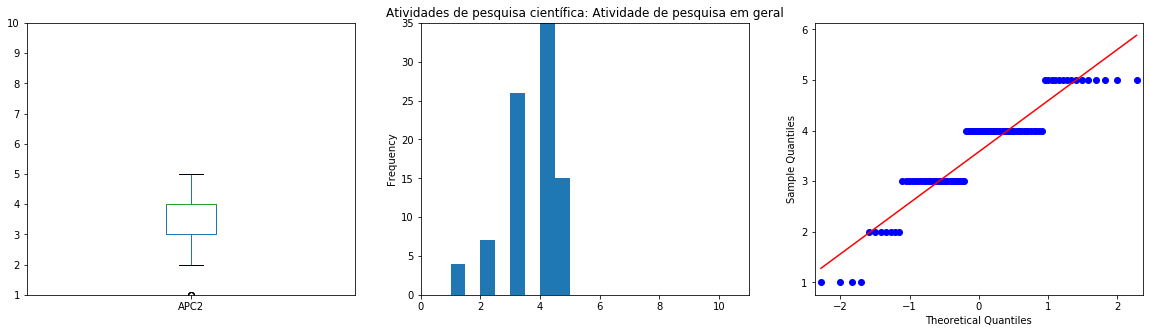

In [12]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["APC2"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["APC2"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de pesquisa científica: Atividade de pesquisa em geral').set_ylim(0, 35)
qqplot(df["APC2"], line='s', ax=axes[2])
plt.show()

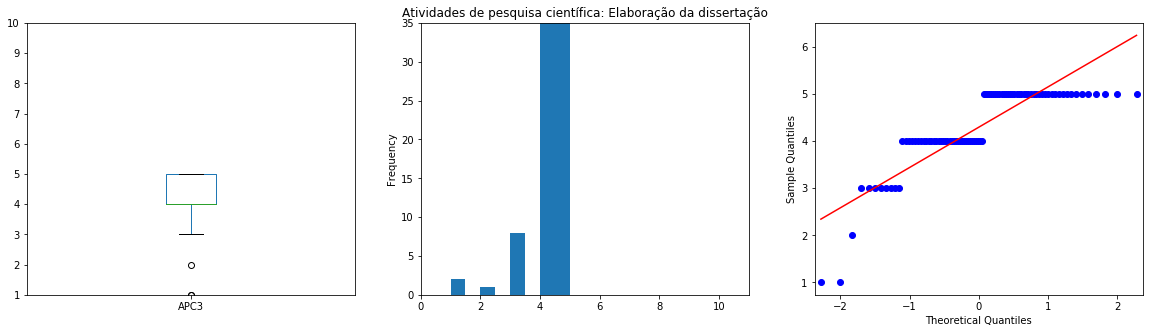

In [13]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["APC3"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["APC3"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de pesquisa científica: Elaboração da dissertação').set_ylim(0, 35)
qqplot(df["APC3"], line='s', ax=axes[2])
plt.show()

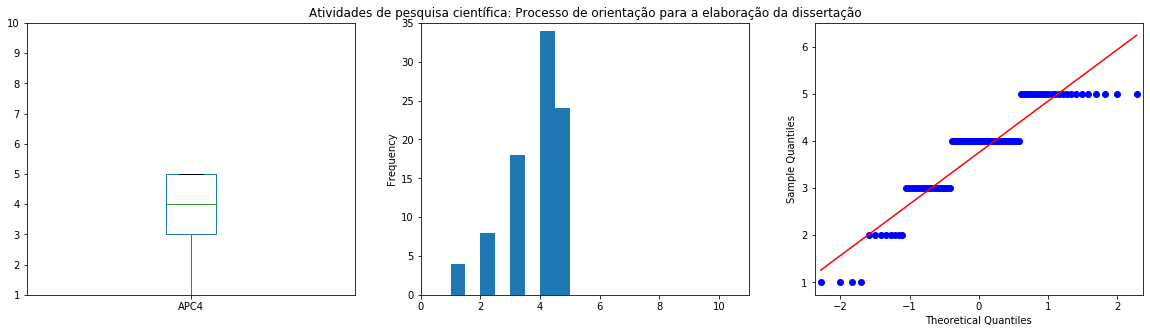

In [14]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["APC4"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["APC4"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de pesquisa científica: Processo de orientação para a elaboração da dissertação').set_ylim(0, 35)
qqplot(df["APC4"], line='s', ax=axes[2])
plt.show()

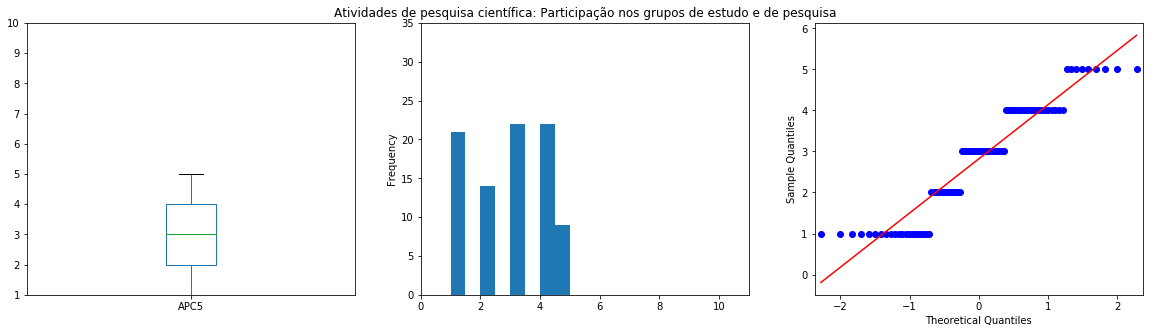

In [15]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["APC5"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["APC5"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de pesquisa científica: Participação nos grupos de estudo e de pesquisa').set_ylim(0, 35)
qqplot(df["APC5"], line='s', ax=axes[2])
plt.show()

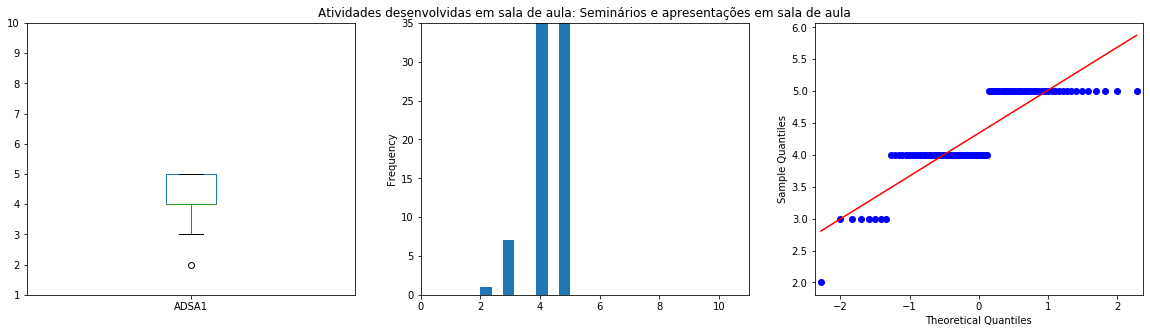

In [16]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["ADSA1"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["ADSA1"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades desenvolvidas em sala de aula: Seminários e apresentações em sala de aula').set_ylim(0, 35)
qqplot(df["ADSA1"], line='s', ax=axes[2])
plt.show()

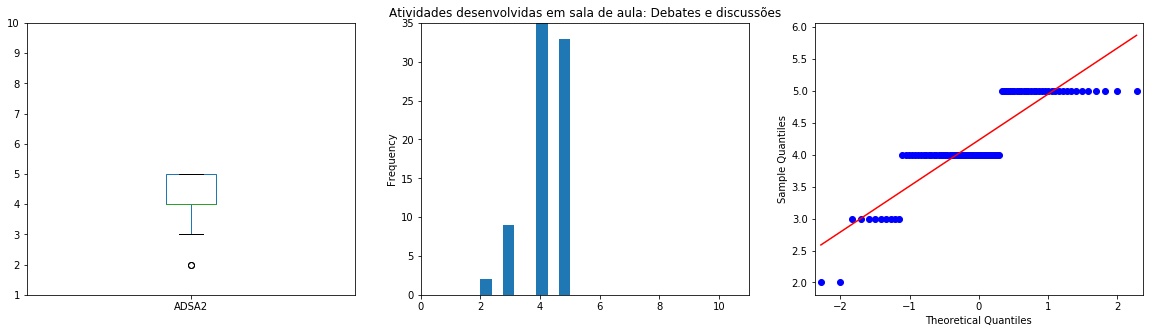

In [17]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["ADSA2"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["ADSA2"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades desenvolvidas em sala de aula: Debates e discussões').set_ylim(0, 35)
qqplot(df["ADSA2"], line='s', ax=axes[2])
plt.show()

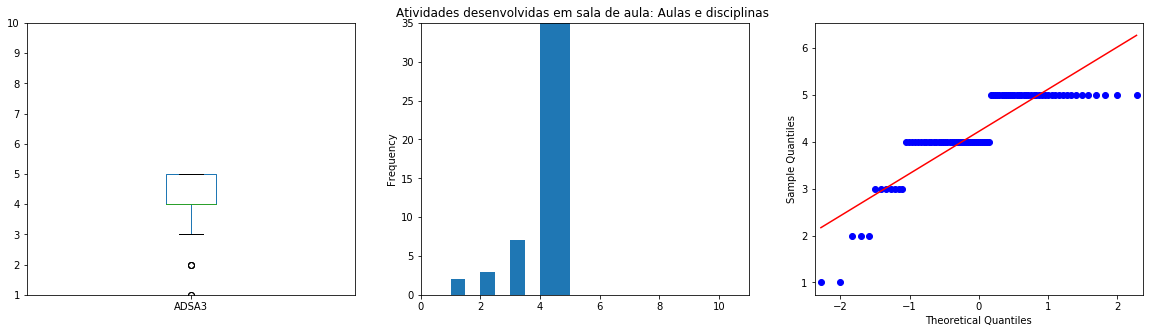

In [18]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["ADSA3"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["ADSA3"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades desenvolvidas em sala de aula: Aulas e disciplinas ').set_ylim(0, 35)
qqplot(df["ADSA3"], line='s', ax=axes[2])
plt.show()

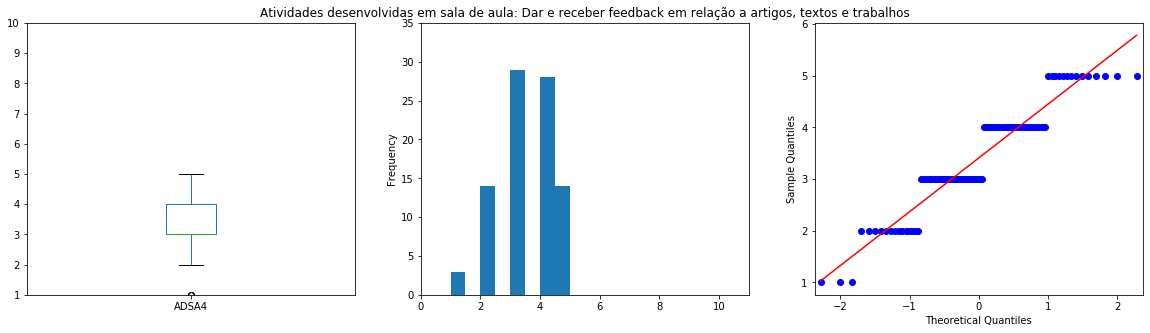

In [19]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["ADSA4"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["ADSA4"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades desenvolvidas em sala de aula: Dar e receber feedback em relação a artigos, textos e trabalhos').set_ylim(0, 35)
qqplot(df["ADSA4"], line='s', ax=axes[2])
plt.show()

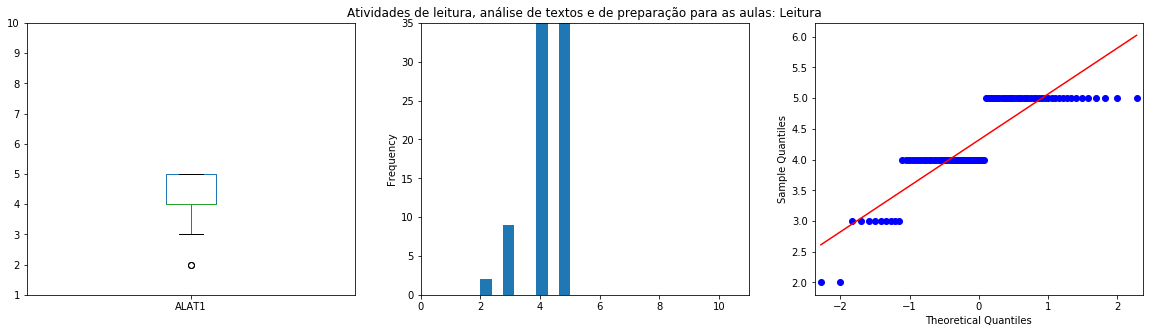

In [20]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["ALAT1"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["ALAT1"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de leitura, análise de textos e de preparação para as aulas: Leitura').set_ylim(0, 35)
qqplot(df["ALAT1"], line='s', ax=axes[2])
plt.show()

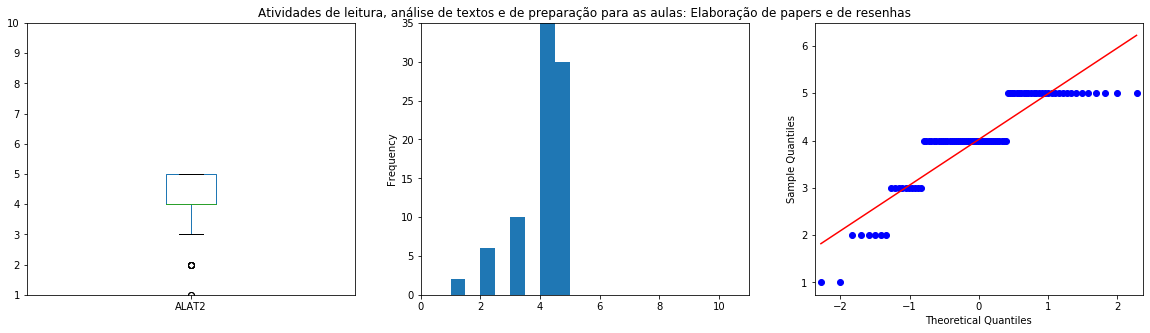

In [21]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["ALAT2"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["ALAT2"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de leitura, análise de textos e de preparação para as aulas: Elaboração de papers e de resenhas').set_ylim(0, 35)
qqplot(df["ALAT2"], line='s', ax=axes[2])
plt.show()

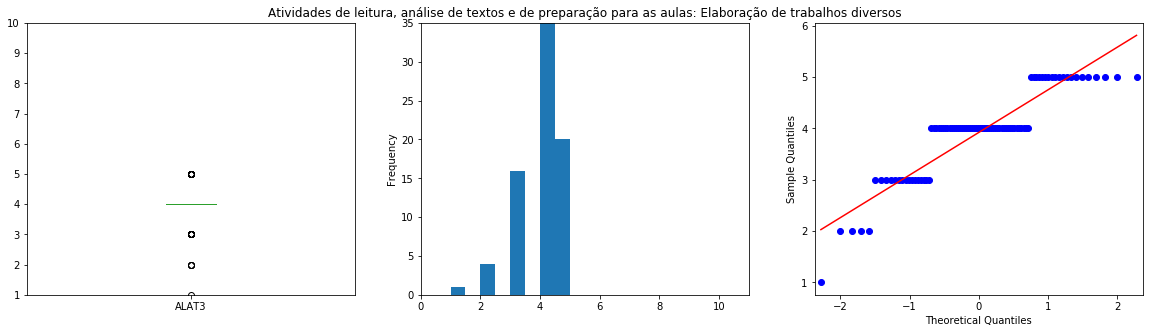

In [22]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["ALAT3"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["ALAT3"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de leitura, análise de textos e de preparação para as aulas: Elaboração de trabalhos diversos').set_ylim(0, 35)
qqplot(df["ALAT3"], line='s', ax=axes[2])
plt.show()

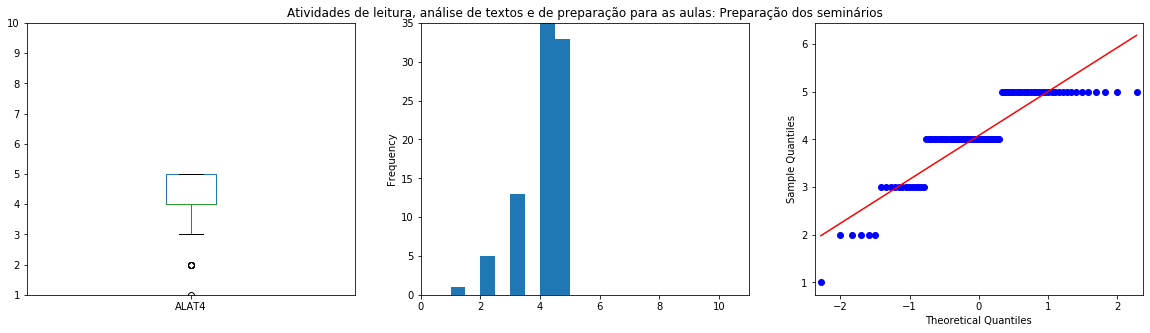

In [23]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["ALAT4"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["ALAT4"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de leitura, análise de textos e de preparação para as aulas: Preparação dos seminários').set_ylim(0, 35)
qqplot(df["ALAT4"], line='s', ax=axes[2])
plt.show()

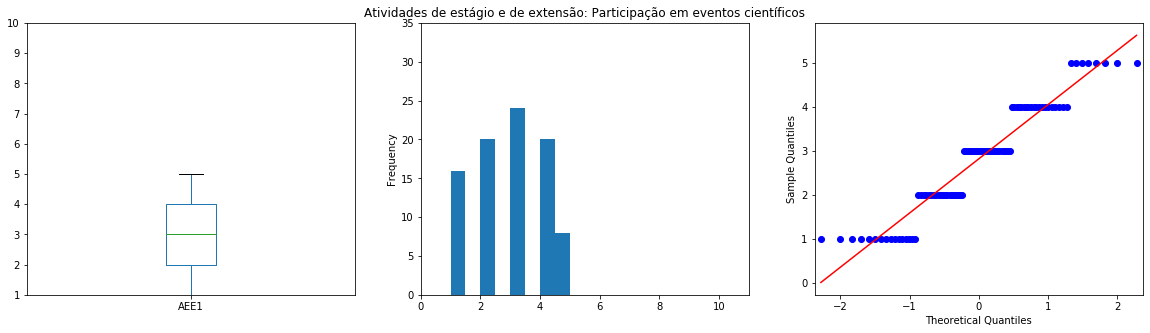

In [24]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AEE1"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["AEE1"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de estágio e de extensão: Participação em eventos científicos').set_ylim(0, 35)
qqplot(df["AEE1"], line='s', ax=axes[2])
plt.show()

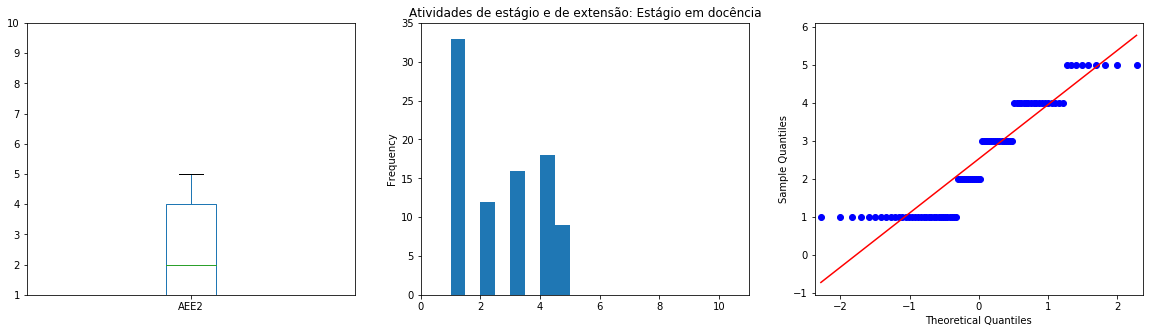

In [25]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AEE2"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["AEE2"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de estágio e de extensão: Estágio em docência').set_ylim(0, 35)
qqplot(df["AEE2"], line='s', ax=axes[2])
plt.show()

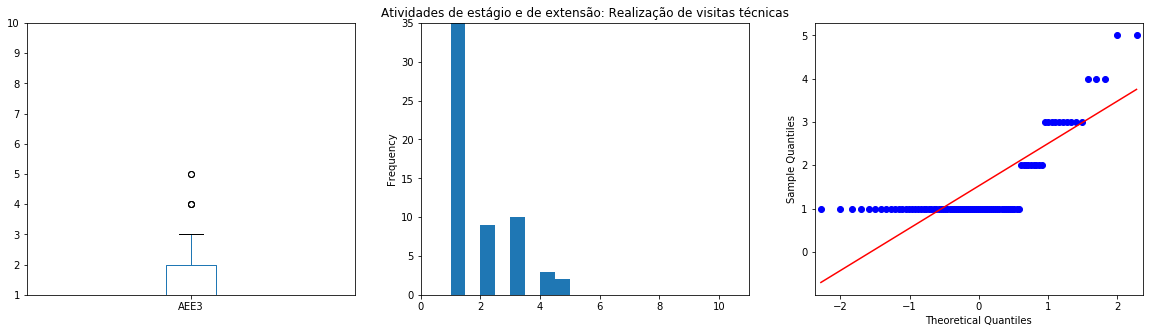

In [26]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AEE3"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["AEE3"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades de estágio e de extensão: Realização de visitas técnicas').set_ylim(0, 35)
qqplot(df["AEE3"], line='s', ax=axes[2])
plt.show()

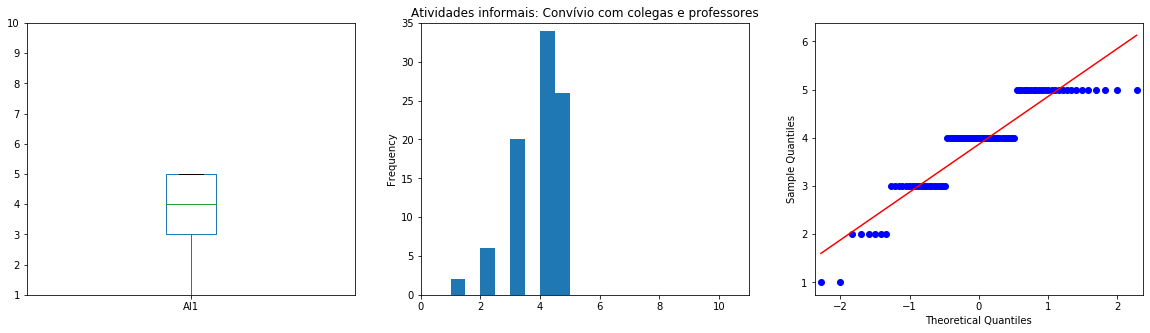

In [27]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AI1"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["AI1"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades informais: Convívio com colegas e professores').set_ylim(0, 35)
qqplot(df["AI1"], line='s', ax=axes[2])
plt.show()

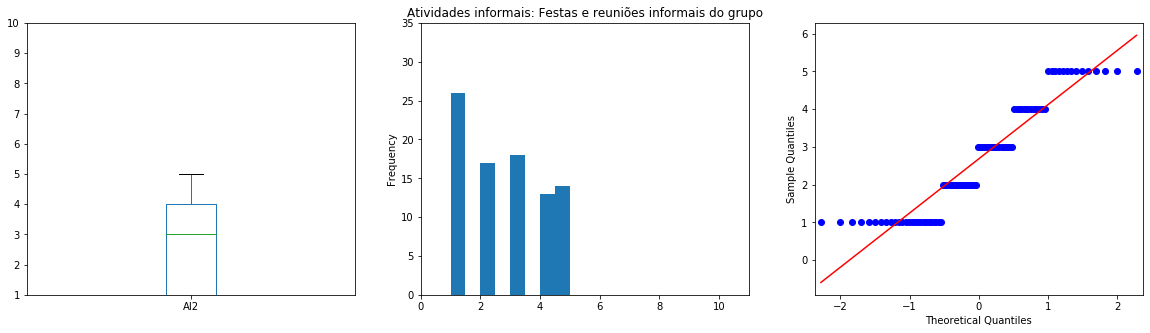

In [28]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AI2"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["AI2"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades informais: Festas e reuniões informais do grupo').set_ylim(0, 35)
qqplot(df["AI2"], line='s', ax=axes[2])
plt.show()

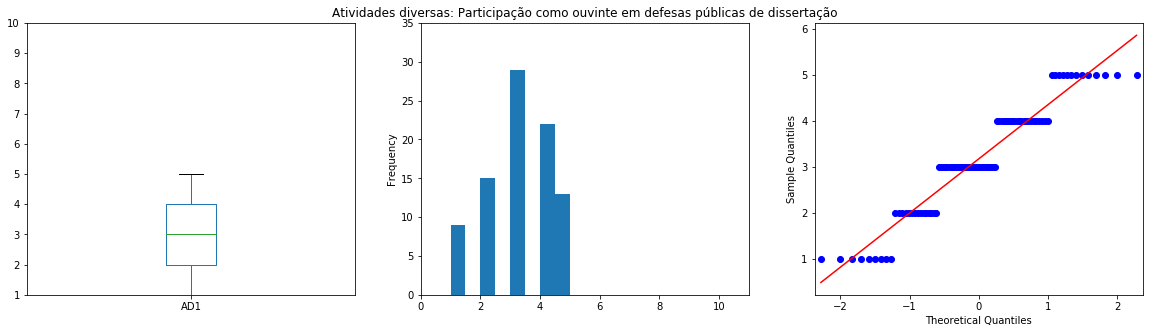

In [29]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AD1"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["AD1"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades diversas: Participação como ouvinte em defesas públicas de dissertação').set_ylim(0, 35)
qqplot(df["AD1"], line='s', ax=axes[2])
plt.show()

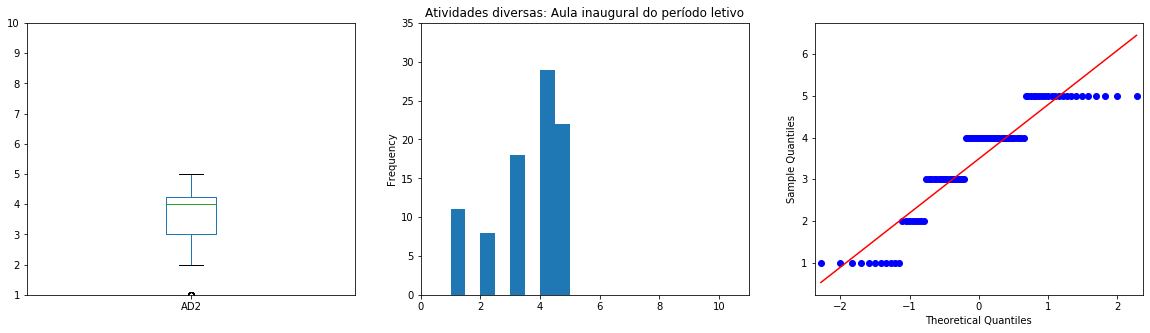

In [30]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AD2"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["AD2"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades diversas: Aula inaugural do período letivo').set_ylim(0, 35)
qqplot(df["AD2"], line='s', ax=axes[2])
plt.show()

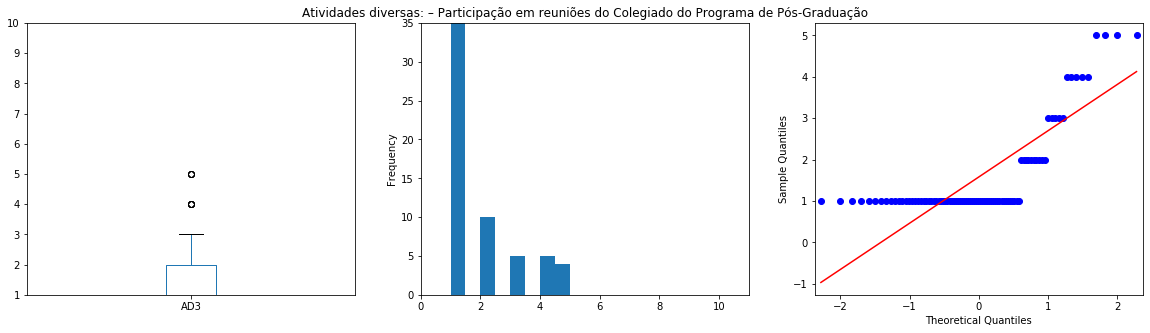

In [31]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AD3"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["AD3"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades diversas: – Participação em reuniões do Colegiado do Programa de Pós-Graduação').set_ylim(0, 35)
qqplot(df["AD3"], line='s', ax=axes[2])
plt.show()

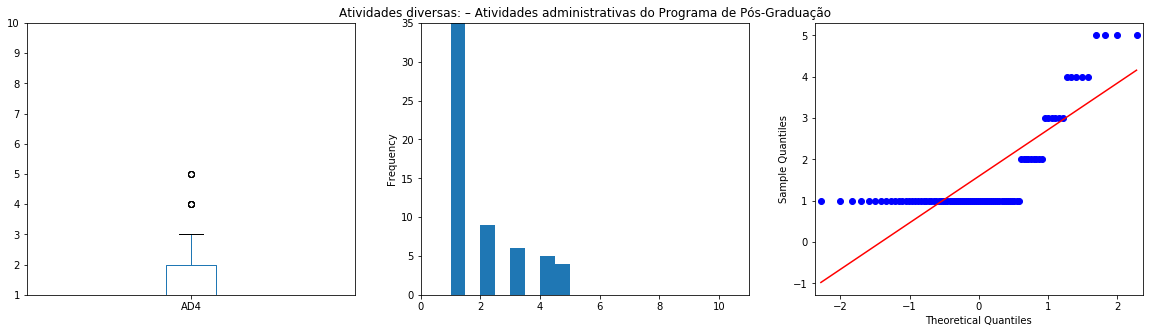

In [32]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AD4"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["AD4"].plot('hist', bins=8, ax=axes[1], xlim=(0, 11), title='Atividades diversas: – Atividades administrativas do Programa de Pós-Graduação').set_ylim(0, 35)
qqplot(df["AD4"], line='s', ax=axes[2])
plt.show()

### Análise

A partir dos gráficos plotados, conseguimos observar que:
- Todas as variáveis se distanciam muito da linha dos gráficos, indicando possível desvio da normalidade
- As seguintes variáveis possuem as menores notas: Atividades de estágio e de extensão: Realização de visitas técnicas, Atividades diversas: – Participação em reuniões do Colegiado do Programa de Pós-Graduação, Atividades diversas: – Atividades administrativas do Programa de Pós-Graduação
- Percebemos a presença de outliers nas seguintes variáveis: AD4, AD3, AEE3, ALAT4, ALAT3, ALAT2, ALAT1
- A variável ALAT3 é a que mais possui outliers, se comportando de maneira diferente das demais

### Normalidade dos dados

In [33]:
Normal = pd.DataFrame({'N': df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']].count(),
                     'Curtose': df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']].kurtosis(),
                     'Assimetria': df[['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']].skew()})

In [34]:
Normal.round(4)

,N,Curtose,Assimetria
APC1,88,-0.4370,-0.6398
APC2,88,0.2237,-0.6278
APC3,88,3.5811,-1.6149
APC4,88,0.0367,-0.7706
APC5,88,-1.1867,-0.0200
ADSA1,88,0.4630,-0.7672
ADSA2,88,0.5714,-0.7482
ADSA3,88,2.7536,-1.4998
ADSA4,88,-0.5374,-0.2150
ALAT1,88,0.5358,-0.9350


Calcular curtose e assimetria para cada um dos dados:

In [35]:
Normal['Z_Curtose'] = Normal['Curtose'] / np.sqrt(24/Normal['N'])
Normal['Z_Assimetria'] = Normal['Assimetria'] / np.sqrt(6/Normal['N'])

In [36]:
colunas = ['APC1', 'APC2', 'APC3', 'APC4', 'APC5', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1', 'AEE2', 'AEE3', 'AI1', 'AI2', 'AD1', 'AD2', 'AD3', 'AD4']

Cálculo das estatísticas e p-valores:

In [37]:
j = 0
while j < len(colunas):
    Normal.at[colunas[j], 'normal_qui'] = st.normaltest(df[colunas[j]])[0]
    Normal.at[colunas[j], 'p-valor_qui'] = st.normaltest(df[colunas[j]])[1]
    Normal.at[colunas[j], 'ks'] = st.kstest(df[colunas[j]], 'norm')[0]
    Normal.at[colunas[j], 'p-valor_ks'] = st.kstest(df[colunas[j]], 'norm')[1]
    Normal.at[colunas[j], 'w'] = shapiro(df[colunas[j]])[0]
    Normal.at[colunas[j], 'p-valor_w'] = shapiro(df[colunas[j]])[1]
    
    j +=1

In [39]:
Normal.round(4)

,N,Curtose,Assimetria,Z_Curtose,Z_Assimetria,normal_qui,p-valor_qui,ks,p-valor_ks,w,p-valor_w
APC1,88,-0.4370,-0.6398,-0.8368,-2.4501,6.6645,0.0357,0.9432,0.0,0.8651,0.0
APC2,88,0.2237,-0.6278,0.4284,-2.4042,6.0193,0.0493,0.9318,0.0,0.8808,0.0
APC3,88,3.5811,-1.6149,6.8573,-6.1847,36.9313,0.0000,0.9646,0.0,0.7388,0.0
APC4,88,0.0367,-0.7706,0.0703,-2.9512,8.1084,0.0173,0.9318,0.0,0.8650,0.0
APC5,88,-1.1867,-0.0200,-2.2723,-0.0765,26.2661,0.0000,0.8413,0.0,0.8913,0.0
ADSA1,88,0.4630,-0.7672,0.8865,-2.9383,8.9999,0.0111,0.9873,0.0,0.7677,0.0
ADSA2,88,0.5714,-0.7482,1.0942,-2.8655,9.0114,0.0110,0.9772,0.0,0.7921,0.0
ADSA3,88,2.7536,-1.4998,5.2727,-5.7438,31.8402,0.0000,0.9545,0.0,0.7565,0.0
ADSA4,88,-0.5374,-0.2150,-1.0291,-0.8235,2.2968,0.3171,0.9432,0.0,0.9068,0.0
ALAT1,88,0.5358,-0.9350,1.0259,-3.5807,12.3066,0.0021,0.9772,0.0,0.7760,0.0


#### Análise

Ao analisar os dados, considerando curtose e assimetria a um nível de significância de 0,05, as seguintes variáveis não violam a condição de normalidade: ADSA4, AEE1, AD1. 

Quando analisamos a um nível de significância de 0,01, as seguintes variáveis não violam a condição de normalidade: APC1, APC2, APC5, ADSA4, AEE1, AEE2, AI2, AD1, AD2

#### Transformação das variáveis

In [40]:
df['APC1_log'] = np.log(df['APC1'])

In [41]:
df['APC2_log'] = np.log(df['APC2'])

In [42]:
df['APC5_log'] = np.log(df['APC5'])

In [43]:
df['ADSA4_log'] = np.log(df['ADSA4'])

In [44]:
df['AEE1_log'] = np.log(df['AEE1'])

In [45]:
df['AEE2_log'] = np.log(df['AEE2'])

In [46]:
df['AI1_log'] = np.log(df['AI1'])

In [47]:
df['AD1_log'] = np.log(df['AD1'])

In [48]:
df['AD2_log'] = np.log(df['AD2'])

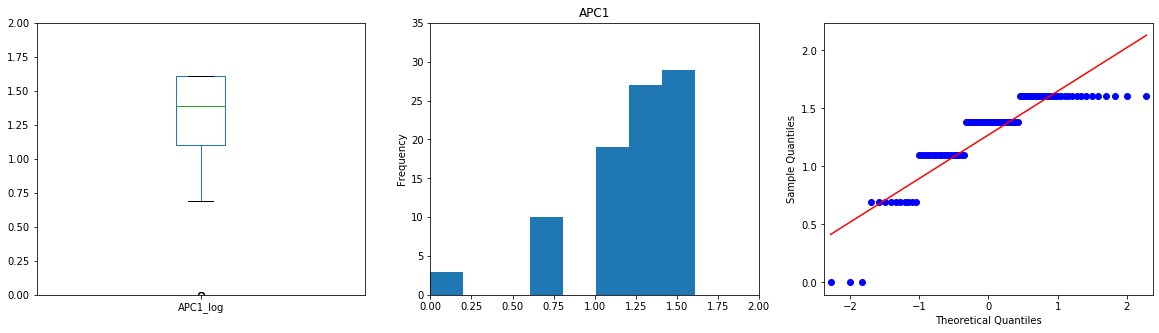

In [58]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["APC1_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["APC1_log"].plot('hist', bins=8, ax=axes[1], xlim=(0, 2), title='APC1').set_ylim(0, 35)
qqplot(df["APC1_log"], line='s', ax=axes[2])
plt.show()

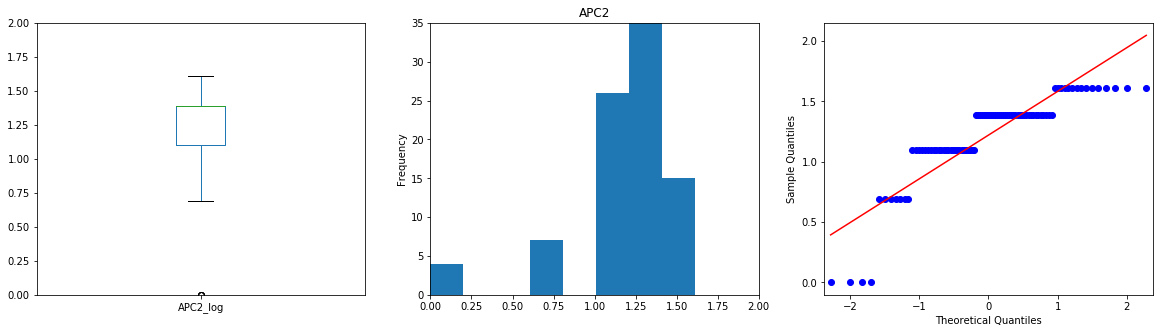

In [59]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["APC2_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["APC2_log"].plot('hist', bins=8, ax=axes[1], xlim=(0, 2), title='APC2').set_ylim(0, 35)
qqplot(df["APC2_log"], line='s', ax=axes[2])
plt.show()

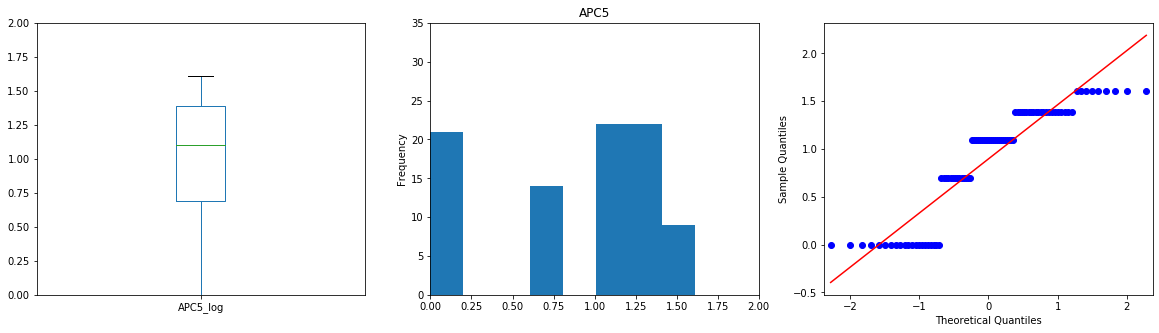

In [60]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["APC5_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["APC5_log"].plot('hist', bins=8, ax=axes[1], xlim=(0, 2), title='APC5').set_ylim(0, 35)
qqplot(df["APC5_log"], line='s', ax=axes[2])
plt.show()

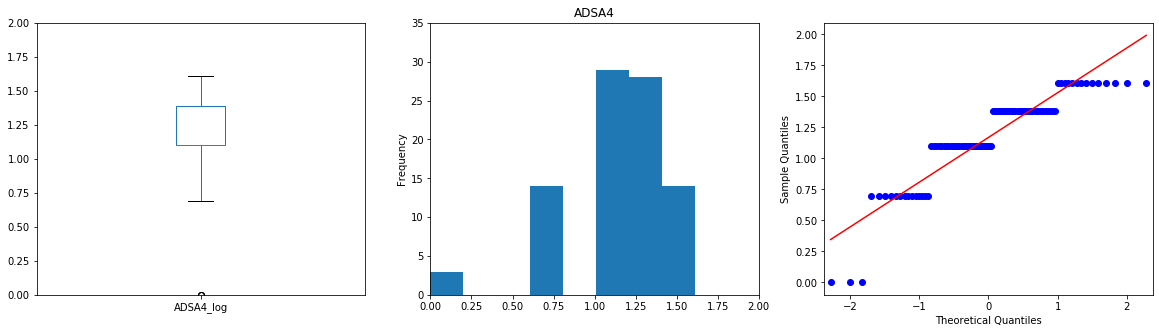

In [61]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["ADSA4_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["ADSA4_log"].plot('hist', bins=8, ax=axes[1], xlim=(0, 2), title='ADSA4').set_ylim(0, 35)
qqplot(df["ADSA4_log"], line='s', ax=axes[2])
plt.show()

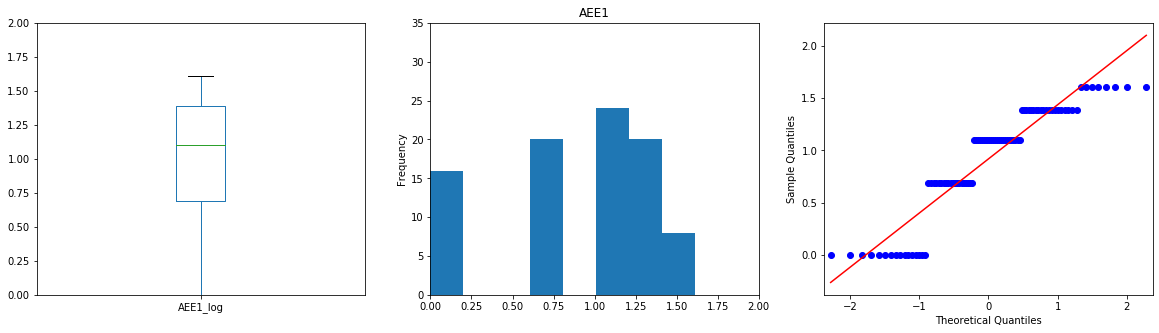

In [62]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AEE1_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["AEE1_log"].plot('hist', bins=8, ax=axes[1], xlim=(0, 2), title='AEE1').set_ylim(0, 35)
qqplot(df["AEE1_log"], line='s', ax=axes[2])
plt.show()

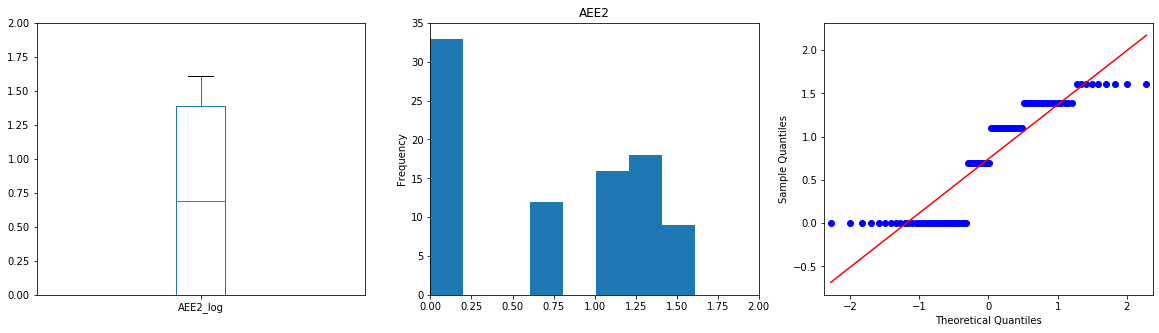

In [63]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AEE2_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["AEE2_log"].plot('hist', bins=8, ax=axes[1], xlim=(0, 2), title='AEE2').set_ylim(0, 35)
qqplot(df["AEE2_log"], line='s', ax=axes[2])
plt.show()

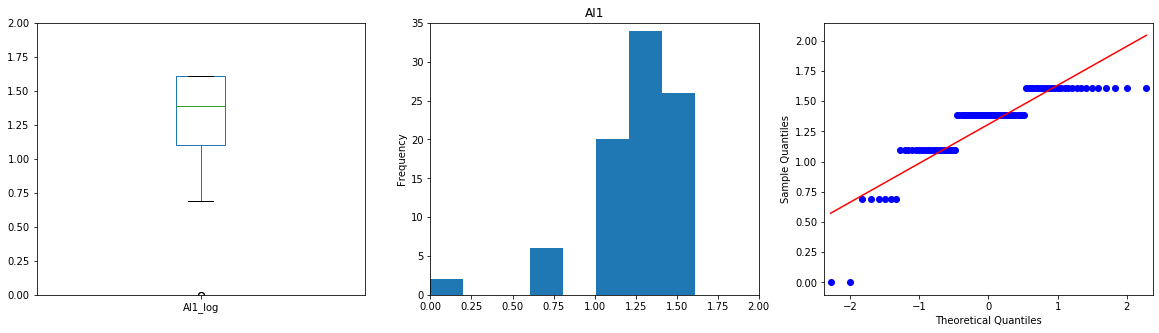

In [64]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AI1_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["AI1_log"].plot('hist', bins=8, ax=axes[1], xlim=(0, 2), title='AI1').set_ylim(0, 35)
qqplot(df["AI1_log"], line='s', ax=axes[2])
plt.show()

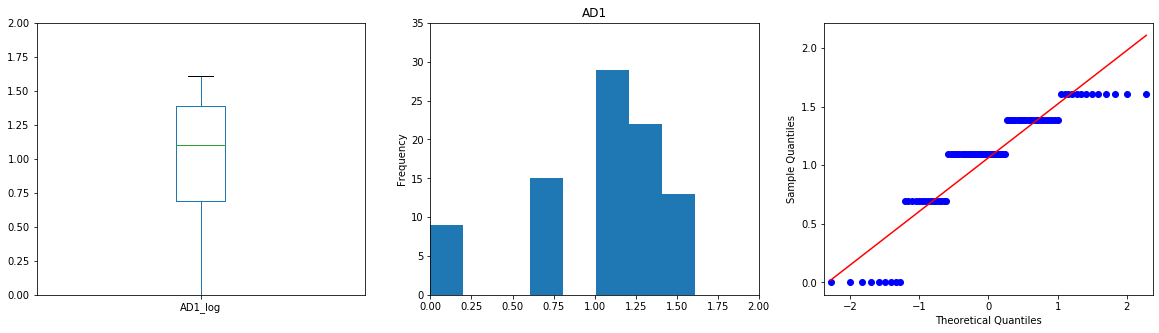

In [65]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AD1_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["AD1_log"].plot('hist', bins=8, ax=axes[1], xlim=(0, 2), title='AD1').set_ylim(0, 35)
qqplot(df["AD1_log"], line='s', ax=axes[2])
plt.show()

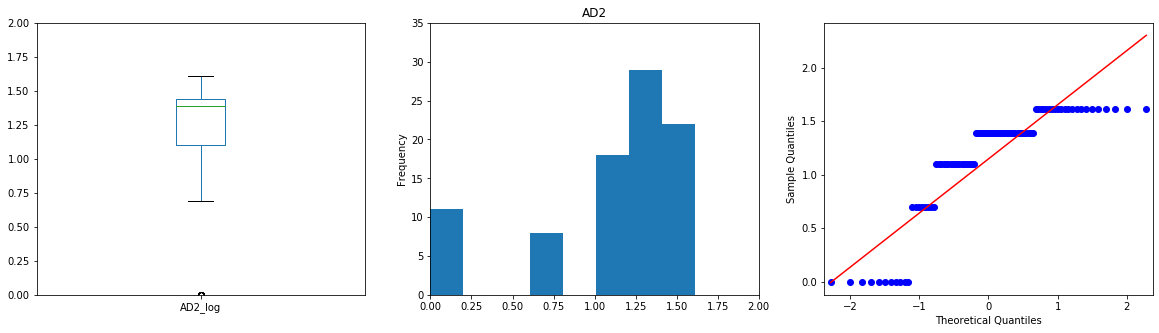

In [66]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["AD2_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["AD2_log"].plot('hist', bins=8, ax=axes[1], xlim=(0, 2), title='AD2').set_ylim(0, 35)
qqplot(df["AD2_log"], line='s', ax=axes[2])
plt.show()

### Correlação entre os dados

In [67]:
df[['APC1_log', 'APC2_log', 'APC3', 'APC4', 'APC5_log', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4_log', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1_log', 'AEE2_log', 'AEE3', 'AI1_log', 'AI2', 'AD1_log', 'AD2_log', 'AD3', 'AD4']].corr().round(4)

,APC1_log,APC2_log,APC3,APC4,APC5_log,ADSA1,ADSA2,ADSA3,ADSA4_log,ALAT1,ALAT2,ALAT3,ALAT4,AEE1_log,AEE2_log,AEE3,AI1_log,AI2,AD1_log,AD2_log,AD3,AD4
APC1_log,1.0000,0.6035,0.2261,0.1818,0.2783,0.2199,0.1822,0.1309,0.3175,0.3555,0.5087,0.3558,0.2536,0.5385,0.3587,0.1350,0.0927,0.0452,0.1933,0.0832,0.0720,0.0882
APC2_log,0.6035,1.0000,0.3151,0.3638,0.4325,0.2522,0.1987,0.1675,0.3084,0.2208,0.3522,0.4960,0.4585,0.5065,0.3209,0.1145,0.2206,0.1971,0.3437,0.0436,0.1782,0.2149
APC3,0.2261,0.3151,1.0000,0.4818,0.0248,0.1609,0.1311,-0.0387,0.2736,0.1019,0.1434,0.2898,0.3314,0.2283,0.0812,0.1144,-0.0513,0.0767,0.2133,-0.0397,0.1065,0.1612
APC4,0.1818,0.3638,0.4818,1.0000,0.3065,0.1784,0.2322,0.2992,0.3995,0.3211,0.3296,0.4561,0.3940,0.2065,0.3077,0.1014,0.1796,0.2181,0.2073,0.2505,0.1753,0.2226
APC5_log,0.2783,0.4325,0.0248,0.3065,1.0000,0.0257,0.2038,0.2461,0.2835,0.0868,0.1700,0.2799,0.2528,0.4140,0.1839,0.1367,0.2313,0.2231,0.1574,0.2958,0.2295,0.2607
ADSA1,0.2199,0.2522,0.1609,0.1784,0.0257,1.0000,0.6158,0.4995,0.2856,0.3271,0.4610,0.4974,0.6545,0.0900,0.2318,0.2305,0.1883,0.2303,0.3302,0.0593,0.0699,0.1093
ADSA2,0.1822,0.1987,0.1311,0.2322,0.2038,0.6158,1.0000,0.4700,0.3950,0.1828,0.4513,0.4310,0.5400,0.1495,0.1404,0.1869,0.3116,0.3347,0.3309,0.2083,0.0483,0.1010
ADSA3,0.1309,0.1675,-0.0387,0.2992,0.2461,0.4995,0.4700,1.0000,0.3922,0.4399,0.3879,0.4355,0.3921,0.1297,0.2631,0.1564,0.3847,0.3534,0.1888,0.2449,0.0339,0.0537
ADSA4_log,0.3175,0.3084,0.2736,0.3995,0.2835,0.2856,0.3950,0.3922,1.0000,0.2851,0.4268,0.4710,0.3698,0.2527,0.1928,0.1764,0.3482,0.2075,0.2788,0.3103,0.0543,0.0357
ALAT1,0.3555,0.2208,0.1019,0.3211,0.0868,0.3271,0.1828,0.4399,0.2851,1.0000,0.5102,0.4080,0.3271,0.2518,0.1999,0.0057,0.3455,0.2324,0.1123,0.0457,-0.0986,-0.1021


#### Análise

Observando a matriz, é possível perceber que existem alguns valores altos entre pares de variáveis (acima de 0,3), o que nos permite dar prosseguimento a Análise Fatorial.

#### Teste de esfericidade de Bartlett

In [68]:
chi_square_value,p_value = bartlett(df[['APC1_log', 'APC2_log', 'APC3', 'APC4', 'APC5_log', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4_log', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1_log', 'AEE2_log', 'AEE3', 'AI1_log', 'AI2', 'AD1_log', 'AD2_log', 'AD3', 'AD4']])
print('Qui_Quadrado: ', chi_square_value.round(3))
print('p_valor: ', p_value.round(3))

Qui_Quadrado:  888.241
p_valor:  0.0


Análise: com o p-valor sendo 0, ele nos conduz à rejeição de a matriz de correlações ser a matriz identidade, evidenciando a correlação entre as variáveis

#### KMO e MSA

In [69]:
MSA,kmo_model=kmo(df[['APC1_log', 'APC2_log', 'APC3', 'APC4', 'APC5_log', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4_log', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1_log', 'AEE2_log', 'AEE3', 'AI1_log', 'AI2', 'AD1_log', 'AD2_log', 'AD3', 'AD4']])

In [70]:
print('KMO: ', kmo_model.round(3))

KMO:  0.754


In [71]:
print('MSA')
variaveis = ['APC1_log', 'APC2_log', 'APC3', 'APC4', 'APC5_log', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4_log', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1_log', 'AEE2_log', 'AEE3', 'AI1_log', 'AI2', 'AD1_log', 'AD2_log', 'AD3', 'AD4']
i = 0
while i < len(variaveis):
    print(variaveis[i], ': ', round(MSA[i],3))
    i +=1

MSA
APC1_log :  0.692
APC2_log :  0.751
APC3 :  0.622
APC4 :  0.728
APC5_log :  0.822
ADSA1 :  0.712
ADSA2 :  0.841
ADSA3 :  0.85
ADSA4_log :  0.909
ALAT1 :  0.766
ALAT2 :  0.762
ALAT3 :  0.872
ALAT4 :  0.778
AEE1_log :  0.841
AEE2_log :  0.728
AEE3 :  0.705
AI1_log :  0.691
AI2 :  0.84
AD1_log :  0.719
AD2_log :  0.621
AD3 :  0.563
AD4 :  0.602


#### Análise KMO e MSA

KMO: valores abaixo de 0,5 sendo inaceitável. No caso dessa análise, o KMO é de 0,754, torna médio a aplicação da Análise fatorial para esse banco de dados

MSA: Valores abaixo de 0,5 indicam que a variável pode não se ajustar à estrutura definida pelas outras variáveis e, portanto, poderá ser eliminada. No caso dessa análise, apesar de próximo, não existe nenhuma variável com valor inferior a 0,5

### Análise fatorial - ajuste do modelo

Inicialmente, o número de fatores será 6, com possibilidade de mudança pós análise caso necessário.

In [134]:
fea = fa(rotation='varimax',n_factors=6, method='principal')
fea.fit(df[['APC1_log', 'APC2_log', 'APC3', 'APC4', 'APC5_log', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4_log', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1_log', 'AEE2_log', 'AEE3', 'AI1_log', 'AI2', 'AD1_log', 'AD2_log', 'AD3', 'AD4']])

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

#### Comunalidade

In [135]:
comunalidade = fea.get_communalities().round(3)

In [136]:
# Impressão dos valores do MSA
print('Comunalidades')
variaveis = ['APC1_log', 'APC2_log', 'APC3', 'APC4', 'APC5_log', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4_log', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1_log', 'AEE2_log', 'AEE3', 'AI1_log', 'AI2', 'AD1_log', 'AD2_log', 'AD3', 'AD4']
i = 0
while i < len(variaveis):
    print(variaveis[i], ': ', round(comunalidade[i],3))
    i +=1

Comunalidades
APC1_log :  0.767
APC2_log :  0.692
APC3 :  0.805
APC4 :  0.76
APC5_log :  0.527
ADSA1 :  0.817
ADSA2 :  0.595
ADSA3 :  0.661
ADSA4_log :  0.474
ALAT1 :  0.565
ALAT2 :  0.655
ALAT3 :  0.694
ALAT4 :  0.686
AEE1_log :  0.644
AEE2_log :  0.494
AEE3 :  0.488
AI1_log :  0.628
AI2 :  0.554
AD1_log :  0.696
AD2_log :  0.673
AD3 :  0.774
AD4 :  0.869


Análise: A comunalidade representa a variância total explicada pelos fatores em cada variável, sendo que seus valores estão entre 0 e 1. Quanto mais alta a comunalidade, maior é a relação com os fatores retidos. Nesse caso, podemos observar algumas variáveis com comunalidades baixas, como a ADSA_log, AEE2_log. Isso indica que talvez elas tenham dificuldade de ficarem retidas em 1 mesmo fator.

#### Autovalores e fatores retidos

In [137]:
ev, v = fea.get_eigenvalues()

In [138]:
autovalor, var, var_acum = fea.get_factor_variance()

In [139]:
# Impressão dos autovalores originais, variância original, autovalores rotacionados e variância rotacionada
print('         Variância Total Explicada')

print('Componente', '| Auovalor', '| Variância(%)', '| Variância Acum.', '| Autovalor Rotacionado', '| Variância Rotacionada', '| Variância Acum. Rot')
variaveis = ['APC1_log', 'APC2_log', 'APC3', 'APC4', 'APC5_log', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4_log', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1_log', 'AEE2_log', 'AEE3', 'AI1_log', 'AI2', 'AD1_log', 'AD2_log', 'AD3', 'AD4']
i = 0
var_acum1 = 0
while i < len(variaveis):
    var_acum1 += ev[i]/len(variaveis)
    if i < len(autovalor):
        print(i+1, '          ', round(ev[i],3), '    ', round(ev[i]/len(variaveis) * 100,3), '       ', round(var_acum1 * 100,3),'         ', 
              round(autovalor[i], 3), '                   ', round(var[i]*100, 3), '                 ', round(var_acum[i]*100, 3) )
    else:
        print(i+1, '          ', round(ev[i],3),'    ',  round(ev[i]/len(variaveis) * 100,3), '        ', round(var_acum1 * 100,3) )
    i +=1

         Variância Total Explicada
Componente | Auovalor | Variância(%) | Variância Acum. | Autovalor Rotacionado | Variância Rotacionada | Variância Acum. Rot
1            6.499      29.543         29.543           3.694                     16.789                   16.789
2            2.287      10.397         39.94           2.644                     12.017                   28.806
3            1.934      8.79         48.73           2.361                     10.732                   39.538
4            1.464      6.653         55.383           2.132                     9.69                   49.228
5            1.239      5.633         61.015           1.854                     8.426                   57.654
6            1.096      4.982         65.998           1.836                     8.344                   65.998
7            0.99      4.502          70.499
8            0.915      4.161          74.66
9            0.748      3.402          78.062
10            0.721      3.277 

#### Análise fatores retidos e variância explicada

- Com base regra de retenção de fatores com valores superiores a 1, foram retidos 6 fatores que conseguem explicar 65,998% da variância dos dados originais.
- Antes da rotação, o primeiro fator explicava 29% da variância dos dados, e após a rotação esse vvalor caiu para 16%

#### Fatores retidos - Scree plot

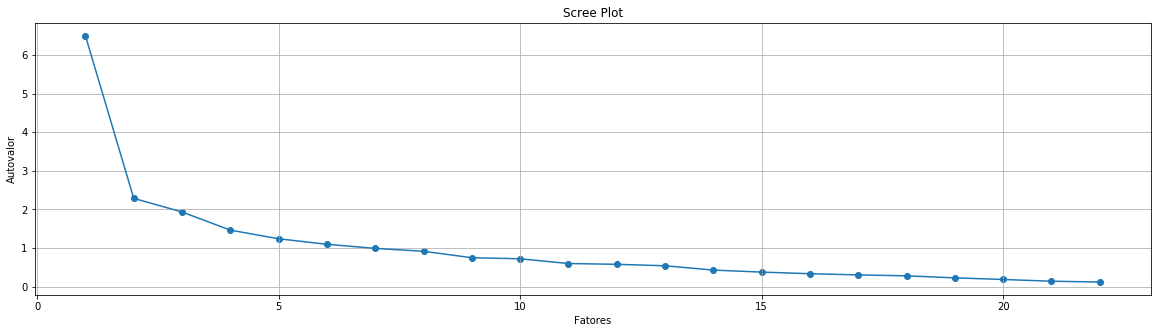

In [140]:
# Cria o Scree Plot utilizando-se MAtPlotLib
plt.scatter(range(1,23),ev)
plt.plot(range(1,23),ev)
plt.title('Scree Plot')
plt.xlabel('Fatores')
plt.ylabel('Autovalor')
plt.grid()
plt.show()

Neste caso, podemos observar que o gráfico se torna mais horizontal a partir do fator 6, reforçando portanto, a retenção de 6 fatores

### Carga fatorial  e interpretação dos fatores

In [141]:
carga_fatorial = fea.loadings_.round(3)

In [142]:
# Impressão dos autovalores originais, variância original, autovalores rotacionados e variância rotacionada
print('         Matriz de Componente Rotativa')
print('                      Componentes (', len(carga_fatorial[0]), ')')
print('Variável')

variaveis = ['APC1_log', 'APC2_log', 'APC3', 'APC4', 'APC5_log', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4_log', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1_log', 'AEE2_log', 'AEE3', 'AI1_log', 'AI2', 'AD1_log', 'AD2_log', 'AD3', 'AD4']
i = 0
while i < len(variaveis):
    print(variaveis[i], '      ', carga_fatorial[i])
    i +=1

         Matriz de Componente Rotativa
                      Componentes ( 6 )
Variável
APC1_log        [ 0.225  0.831 -0.084 -0.017  0.066  0.121]
APC2_log        [0.176 0.723 0.063 0.131 0.298 0.167]
APC3        [-0.028  0.162 -0.102  0.057  0.859  0.161]
APC4        [ 0.369  0.128  0.198  0.263  0.68  -0.189]
APC5_log        [ 0.114  0.485  0.414  0.289  0.037 -0.153]
ADSA1        [ 0.625 -0.01  -0.097  0.046  0.121  0.633]
ADSA2        [ 0.532 -0.018  0.192  0.019  0.129  0.508]
ADSA3        [ 0.752 -0.031  0.254  0.129 -0.078  0.087]
ADSA4_log        [ 0.406  0.226  0.349 -0.041  0.36   0.069]
ALAT1        [ 0.689  0.225  0.053 -0.102  0.061 -0.151]
ALAT2        [ 0.702  0.344  0.085 -0.11   0.146  0.056]
ALAT3        [ 0.601  0.29   0.25  -0.057  0.355  0.238]
ALAT4        [0.537 0.166 0.156 0.034 0.38  0.447]
AEE1_log        [0.051 0.767 0.205 0.035 0.089 0.036]
AEE2_log        [ 0.394  0.392 -0.135  0.391 -0.1    0.07 ]
AEE3        [-0.028  0.167  0.144  0.27  -0.078  0.599]
AI

#### Composição dos fatores

Podemos agrupar as variáveis em fatores a partir da carga fatorial. Dessa forma, os fatores formados são:

Fator 1: ADSA2, ADSA3, ADSA4_log, ALAT1, ALAT2, ALAT3, ALAT4

Fator 2:APC1_log, APC2_log, APC5_log, AEE1_log

Fator 3:AI1_log, AI2, AD1_log, AD2_log

Fator 4:AD3, AD4

Fator 5:APC3, APC4

Fator 6:ADSA1, AEE3

Cargas dobradas: AEE2_log

### Cálculo dos Escores Fatoriais para cada um dos elementos da amostra

In [144]:
fatores = fea.transform(df[['APC1_log', 'APC2_log', 'APC3', 'APC4', 'APC5_log', 'ADSA1', 'ADSA2', 'ADSA3', 'ADSA4_log', 'ALAT1', 'ALAT2', 'ALAT3', 'ALAT4', 'AEE1_log', 'AEE2_log', 'AEE3', 'AI1_log', 'AI2', 'AD1_log', 'AD2_log', 'AD3', 'AD4']])

In [145]:
# Transforma os fatores gerados para cada observação em um novo Data Frame
df_fat=pd.DataFrame(fatores, columns=['Fat1', 'Fat2', 'Fat3','Fat4','Fat5', 'Fat6']) 

In [146]:
df_fat.head(3)

,Fat1,Fat2,Fat3,Fat4,Fat5,Fat6
0,0.078635,-2.914959,0.520420,-0.490574,1.320297,-0.611603
1,0.985000,-1.320973,0.363786,3.041872,0.990791,0.298180
2,-0.742158,0.449554,1.441819,-1.255785,0.971319,0.664152


In [147]:
df = pd.concat([df, df_fat], axis=1).reindex(df.index)

In [148]:
df.head(3)

,RespondentID,Sexo,Idade,Graduacao,Graduacao_Outro,IES_Graduacao,Lato1,Lato2,Lato3,Lato4,Lato5,IES_Lato1,IES_Lato2,IES_Lato3,IES_Lato4,IES_Lato5,Destino_Profissional,Destino_Profissional_Outro,MESTRADO_IES,MESTRADO_IES_Outro,Area_Mestrado,Atuacao_Docente_Antes_Mestrado,Tempo_Entre_Graduacao_Mestrado,Regime_Dedicacao_Mestrado,Atuacao_Docente_Durante_Mestrado,Tipo_IES_Atuacao_Mestrado,Regime_Dedicacao_Docente_Mestrado,Tempo_Atuacao_Docente_Mestrado,Mestrado_Ativ_Aprendizagem_Pesq_Cientifica,Mestrado_Ativ_Aprendizagem_Sala_Aula,Mestrado_Ativ_Aprendizagem_Leitura,Mestrado_Ativ_Aprendizagem_Estagio,Mestrado_Ativ_Aprendizagem_Informais,Mestrado_Ativ_Aprendizagem_Outros,DOUTORADO_IES,DOUTORADO_IES_Outro,Area_Doutorado,Atuacao_Docente_Antes_Doutorado,Tempo_Entre_Mestrado_Doutorado,Regime_Dedicacao_Doutorado,Atuacao_Docente_Durante_Doutorado,Tipo_IES_Atuacao_Doutorado,Regime_Dedicacao_Docente_Doutorado,Tempo_Atuacao_Docente,Doutorado_Ativ_Aprendizagem_Pesq_Cientifica,Doutorado_Ativ_Aprendizagem_Sala_Aula,Doutorado_Ativ_Aprendizagem_Leitura,Doutorado_Ativ_Aprendizagem_Estagio,Doutorado_Ativ_Aprendizagem_Informais,Doutorado_Ativ_Aprendizagem_Outros,...,AD2,AD3,AD4,AD_OUTRO,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC5_1,FAC6_1,FAC7_1,APC1_log,APC2_log,APC5_log,ADSA4_log,AEE1_log,AEE2_log,AI1_log,AD1_log,AD2_log,Fat1,Fat2,Fat3,Fat4,Fat5,Fat6
0,1.812837e+09,2.0,40.0,1.0,NaN,1.0,ESTATÍSTICA,MARKETING,NaN,NaN,NaN,UFU,UFU,NaN,NaN,NaN,1.0,NaN,3.0,NaN,MARKETING,2.0,4.0,1.0,2.0,2.0,1.0,3.0,NaN,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,1.0,NaN,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,-0.127755,-2.304441,0.418520,-0.418158,0.006100,1.180256,-0.998602,0.000000,0.693147,0.000000,1.098612,0.000000,0.000000,1.386294,0.693147,1.386294,0.078635,-2.914959,0.520420,-0.490574,1.320297,-0.611603
1,1.811174e+09,2.0,44.0,0.0,Engenharia Civil,2.0,Administração de RH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,Relações de poder e dinâmica das organizações,1.0,4.0,1.0,1.0,1.0,3.0,5.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,5.0,NaN,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,0.860313,-1.486463,0.365600,3.053769,0.920257,1.019630,-0.009606,1.098612,1.098612,0.693147,1.386294,0.693147,1.609438,1.609438,1.386294,1.386294,0.985000,-1.320973,0.363786,3.041872,0.990791,0.298180
2,1.806566e+09,1.0,29.0,0.0,Enfermagem,2.0,Enfermagem do Trabalho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,Organização e Estratégia,1.0,3.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,1.0,1.0,NaN,4.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,3.0,5.0,4.0,1.0,4.0,4.0,3.0,5.0,5.0,5.0,1.0,1.0,1.0,4.0,4.0,5.0,0.285949,0.964877,1.771231,-0.897291,-1.406901,0.602186,-0.591369,1.609438,1.609438,0.000000,1.609438,1.609438,0.000000,1.609438,1.609438,1.609438,-0.742158,0.449554,1.441819,-1.255785,0.971319,0.664152
